# Dataset Information

   Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
   
   This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

### Importing Dataset

In [2]:
df=pd.read_csv('Loan Prediction Dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [7]:
### filling th emissing values of the categorical values with mode
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [8]:
### filling missing values of numerical values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)


In [9]:
## checking if any missing values are left
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
## dropping loan_ID column as it is of no use
df.drop('Loan_ID',inplace =True,axis=1)

### EDA

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


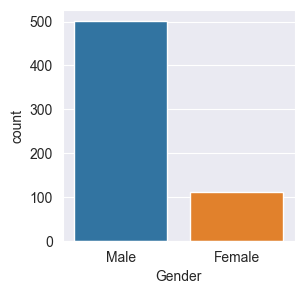

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


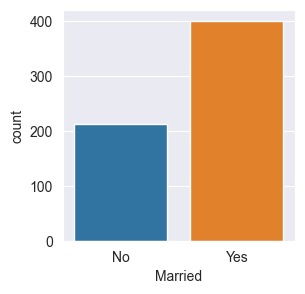

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


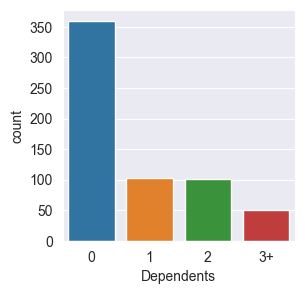

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


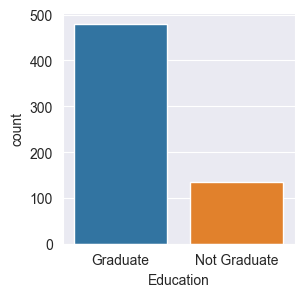

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


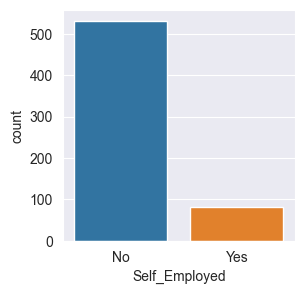

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


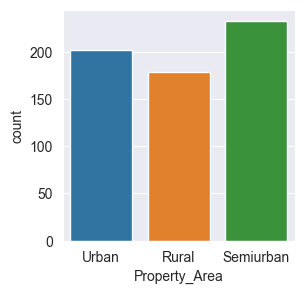

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


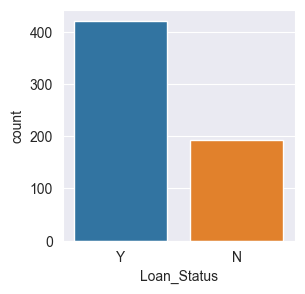

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(3,3))
    sns.countplot(df[feature])
    plt.show()

In [15]:
df['ApplicantIncome']=df['ApplicantIncome'].astype(float)

In [16]:
numerical_features=[feature for feature in df.columns if df[feature].dtype == 'float64' ]
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


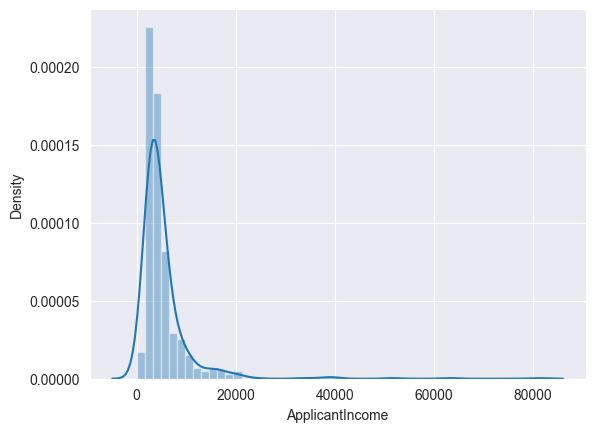

<Figure size 300x300 with 0 Axes>

In [17]:
sns.distplot(df['ApplicantIncome'])
plt.figure(figsize=(3,3))
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


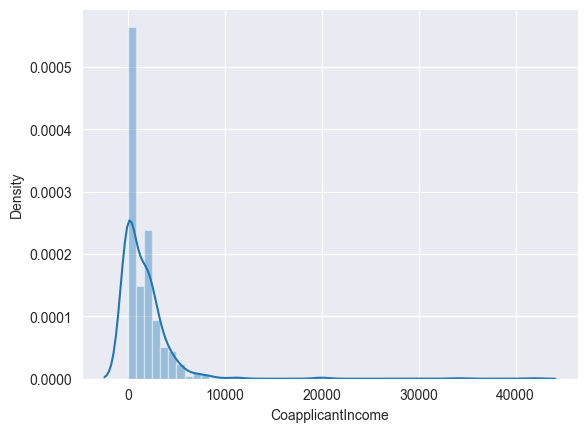

<Figure size 300x300 with 0 Axes>

In [18]:
sns.distplot(df['CoapplicantIncome'])
plt.figure(figsize=(3,3))
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


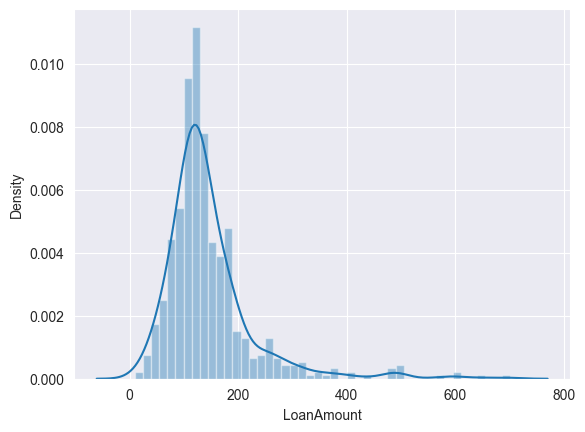

<Figure size 300x300 with 0 Axes>

In [19]:
sns.distplot(df['LoanAmount'])
plt.figure(figsize=(3,3))
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


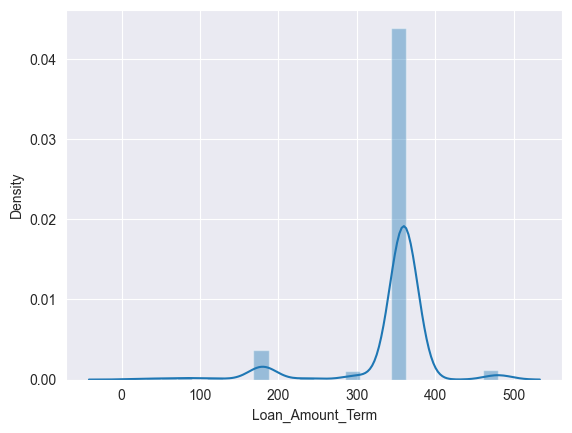

<Figure size 300x300 with 0 Axes>

In [20]:
sns.distplot(df['Loan_Amount_Term'])
plt.figure(figsize=(3,3))
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


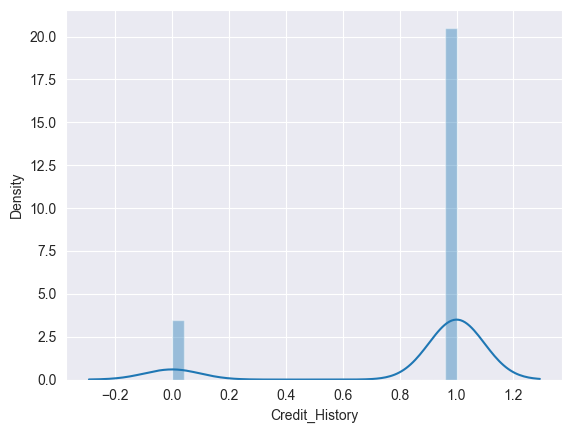

<Figure size 300x300 with 0 Axes>

In [21]:
sns.distplot(df['Credit_History'])
plt.figure(figsize=(3,3))
plt.show()

##### numerical values are showing a skewed graph so we need to normalize it using log transformation

In [22]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


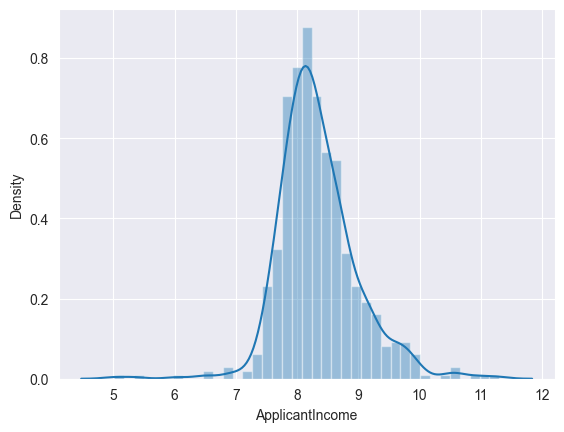

In [23]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


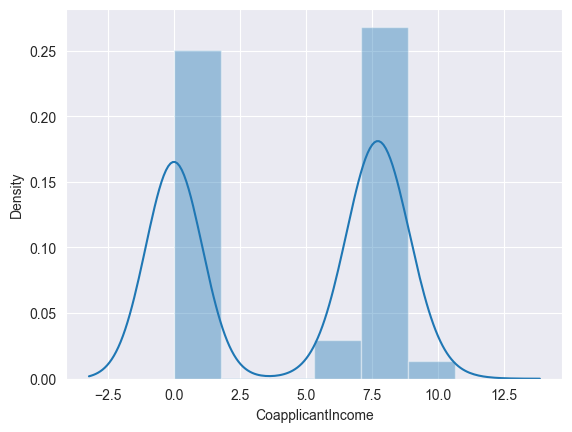

In [24]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


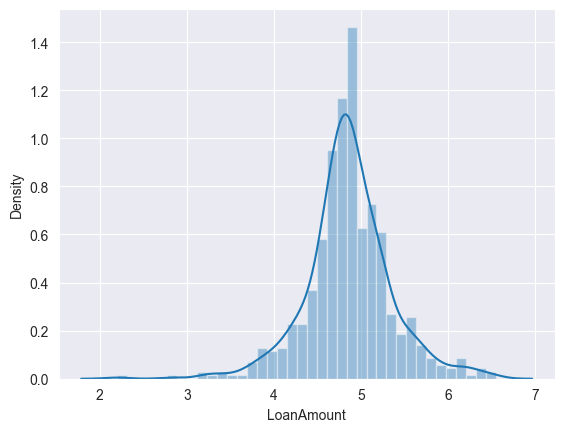

In [25]:
df['LoanAmount']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


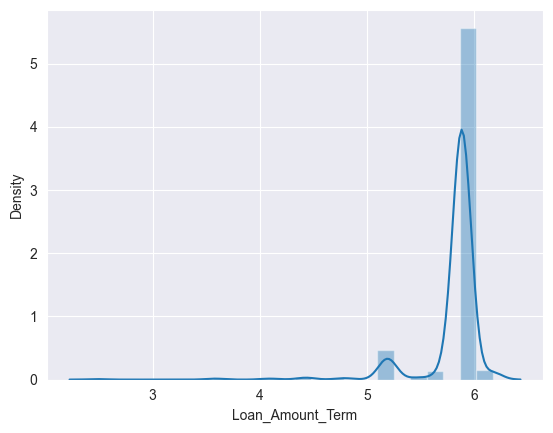

In [26]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


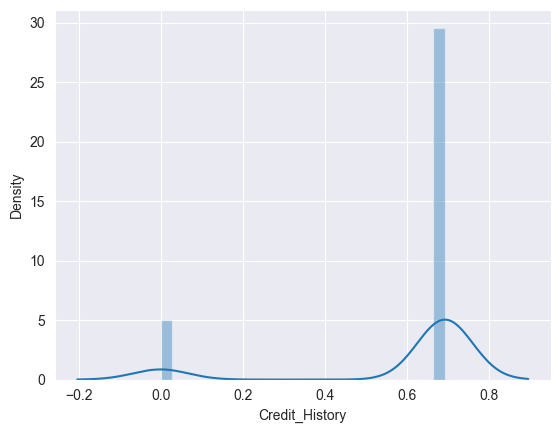

In [27]:
df['Credit_History']=np.log(df['Credit_History']+1)
sns.distplot(df['Credit_History'])
plt.show()

### Correlation matrix

In [28]:
df['Loan_Status']=np.where(df['Loan_Status']=='Y',1,0)

In [29]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [30]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.368244,0.491332,-0.015207,0.013468,0.010977
CoapplicantIncome,-0.368244,1.000000,0.133158,0.013366,0.008274,0.060593
LoanAmount,0.491332,0.133158,1.000000,0.083448,-0.018547,-0.037997
Loan_Amount_Term,-0.015207,0.013366,0.083448,1.000000,-0.015513,-0.008157
Credit_History,0.013468,0.008274,-0.018547,-0.015513,1.000000,0.540556
Loan_Status,0.010977,0.060593,-0.037997,-0.008157,0.540556,1.000000


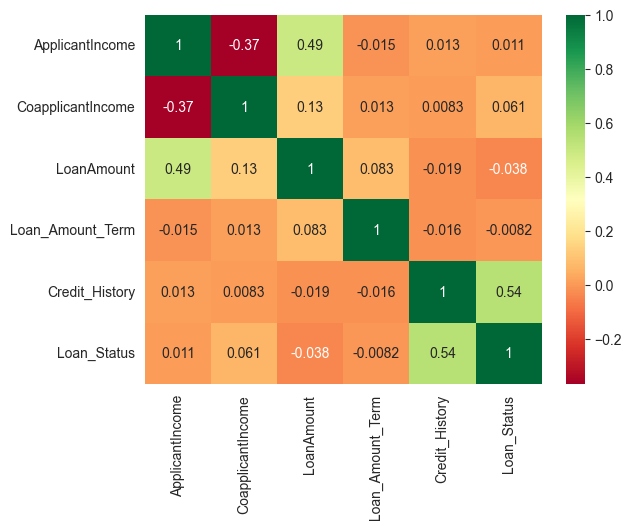

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,5.886104,0.693147,Urban,1
1,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,0.693147,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,0.693147,Urban,1
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,0.693147,Urban,1
4,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,0.693147,Urban,1


### Label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
     

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,4.852030,5.886104,0.693147,2,1
1,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,0.693147,0,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,0.693147,2,1
3,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,0.693147,2,1
4,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,0.693147,2,1


In [35]:
x=df.iloc[:,:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,0.000000,4.852030,5.886104,0.693147,2
1,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,0.693147,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,0.693147,2
3,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,0.693147,2
4,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,0.693147,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.000000,4.262680,5.886104,0.693147,0
610,1,1,3,0,0,8.320205,0.000000,3.688879,5.192957,0.693147,0
611,1,1,1,0,0,8.996157,5.484797,5.533389,5.886104,0.693147,2
612,1,1,2,0,0,8.933664,0.000000,5.231109,5.886104,0.693147,2


### feature scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_x=scaler.fit(x)
scaled_x

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
x=pd.DataFrame(scaler.transform(x),columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'])

In [42]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.582270,0.000000,0.609760,0.922014,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.543501,0.688057,0.609760,0.922014,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.476150,0.000000,0.457624,0.922014,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.452363,0.730059,0.594936,0.922014,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.586321,0.000000,0.631977,0.922014,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.470762,0.000000,0.474397,0.922014,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.526032,0.000000,0.342605,0.734112,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.633470,0.515610,0.766255,0.922014,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.623537,0.000000,0.696827,0.922014,1.0,1.0


In [48]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

### Train Test split

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [52]:
### fitting on training data
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
###prediction
pred=lr.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [55]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print('Classification report: \n', classification_report(y_test,pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [57]:
print('Accuracy score : \n', accuracy_score(y_test,pred))

Accuracy score : 
 0.7727272727272727


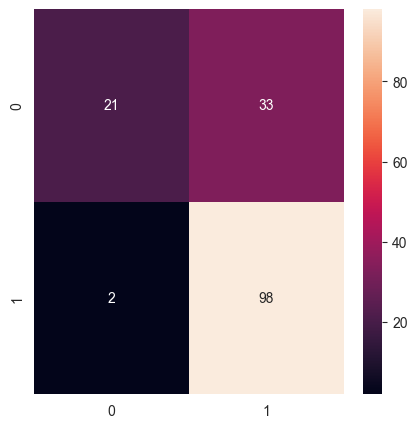

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.show()